# Credit EDA Case Study_application_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_application = pd.read_csv(r'C:\Users\xssadinema\Desktop\Credit EDA\application_data.csv')

In [3]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_application.shape

(307511, 122)

### Checking percentage of missing data :

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [6]:
missing_data(df_application).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


### Checking data unbalance : 
- target value = 1 means client with payment difficulties(late payment: X days late on at least one of the first Y installments od loan)
- target value = 0 means all the other cases

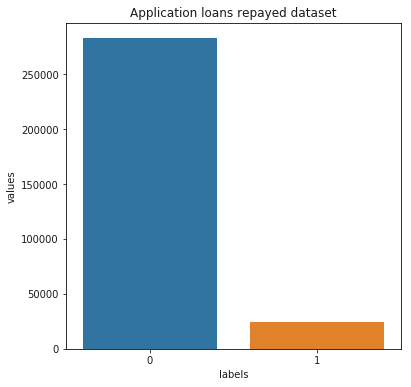

In [7]:
temp = df_application["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [8]:
df

,labels,values
0,0,282686
1,1,24825


In [9]:
# ratio of data imbalance
df['values'][0]/df['values'][1]

11.387150050352467

### Deleting columns where percentage of missing value is greater than or equal to 50% : 

In [10]:
df_app = df_application.dropna(thresh=df_application.shape[0]*0.5,how='all',axis=1,inplace = False)

In [11]:
missing_data(df_app).head()

,Total,Percent
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019


### Identifying outliers : 

In [12]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_app.shape

(307511, 81)

In [14]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [15]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Selecting only numeric columns for checking outliers :

In [16]:
cols = df_app.select_dtypes([np.number]).columns
print(cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

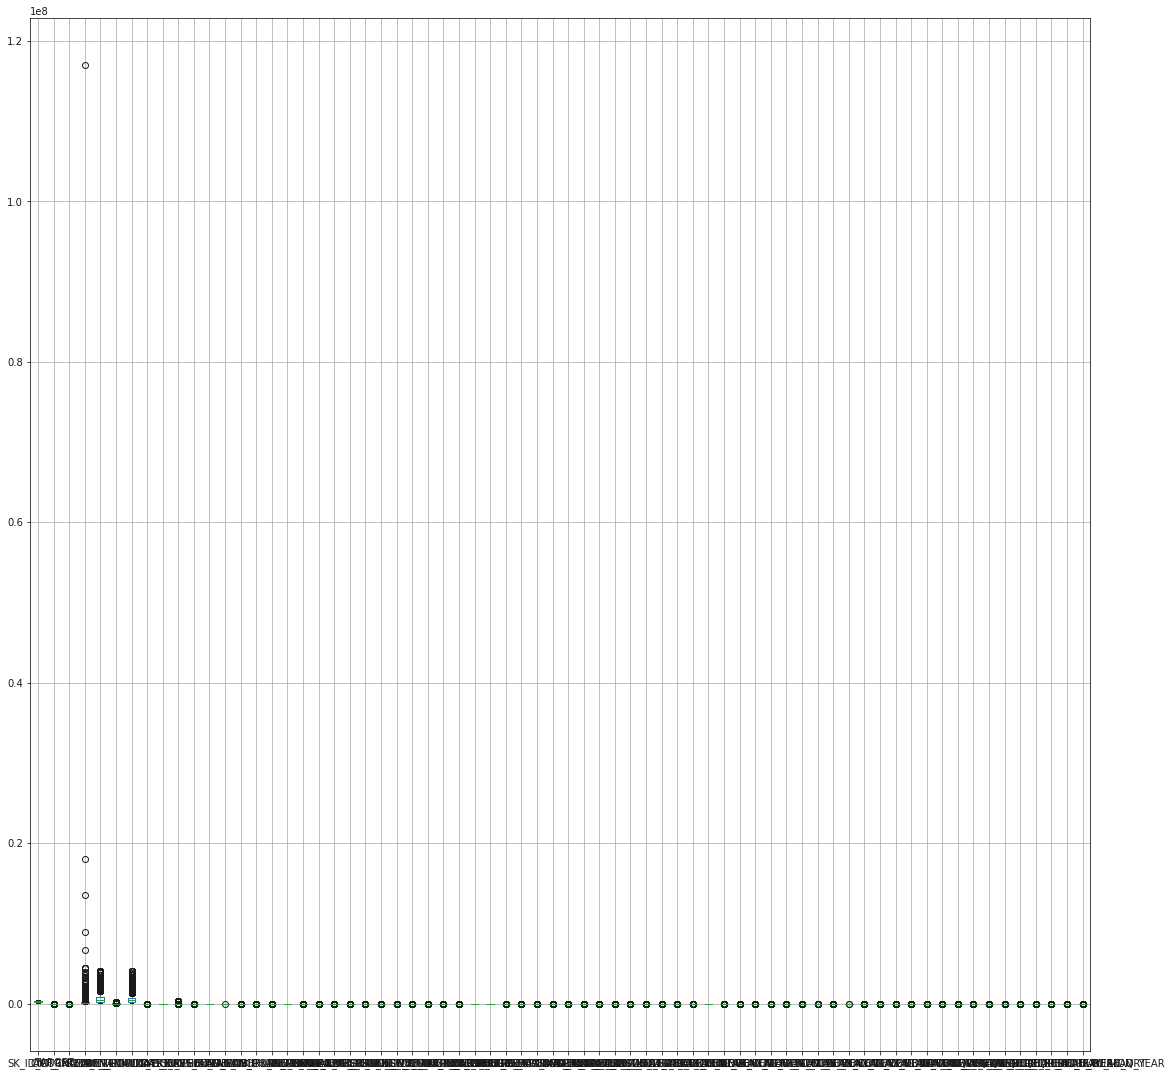

In [17]:
plt.figure(figsize=(19,19))
boxplot = df_app.boxplot(list(cols))

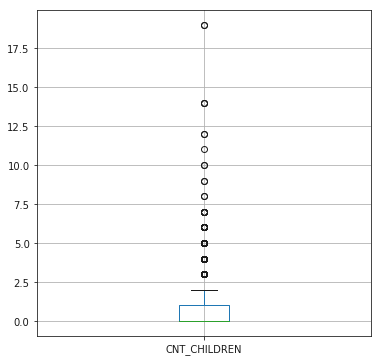

In [18]:
plt.figure(figsize=(6,6))
boxplot = df_app.boxplot('CNT_CHILDREN')

In [19]:
#Get relevant percentiles and see their distribution
df_app['CNT_CHILDREN'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     0.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     1.0
0.9     2.0
1.0    19.0
Name: CNT_CHILDREN, dtype: float64

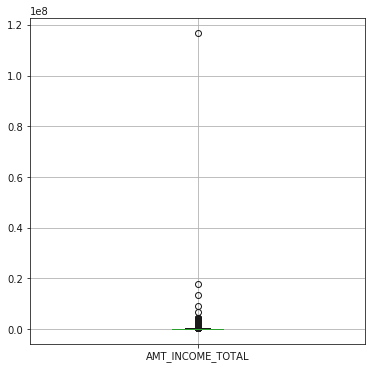

In [20]:
plt.figure(figsize=(6,6))
boxplot = df_app.boxplot('AMT_INCOME_TOTAL')

In [21]:
#Get relevant percentiles and see their distribution
df_app['AMT_INCOME_TOTAL'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        25650.0
0.1        81000.0
0.2        99000.0
0.3       112500.0
0.4       135000.0
0.5       147150.0
0.6       162000.0
0.7       180000.0
0.8       225000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

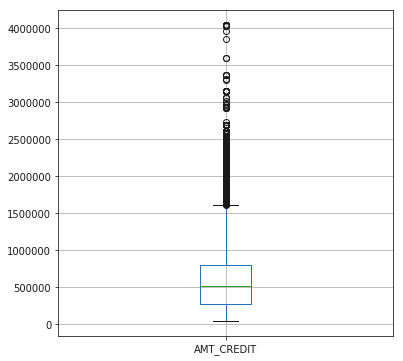

In [22]:
plt.figure(figsize=(6,6))
boxplot = df_app.boxplot('AMT_CREDIT')

In [23]:
#Get relevant percentiles and see their distribution
df_app['AMT_CREDIT'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      45000.0
0.1     180000.0
0.2     254700.0
0.3     306306.0
0.4     432000.0
0.5     513531.0
0.6     604152.0
0.7     755190.0
0.8     900000.0
0.9    1133748.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

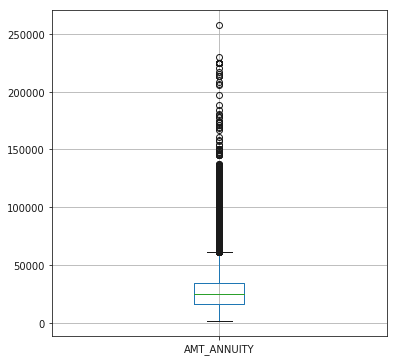

In [24]:
plt.figure(figsize=(6,6))
boxplot = df_app.boxplot('AMT_ANNUITY')

In [25]:
#Get relevant percentiles and see their distribution
df_app['AMT_ANNUITY'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      1615.5
0.1     11074.5
0.2     14701.5
0.3     18189.0
0.4     21865.5
0.5     24903.0
0.6     28062.0
0.7     32004.0
0.8     37516.5
0.9     45954.0
1.0    258025.5
Name: AMT_ANNUITY, dtype: float64

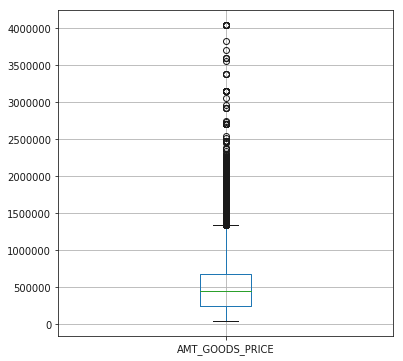

In [26]:
plt.figure(figsize=(6,6))
boxplot = df_app.boxplot('AMT_GOODS_PRICE')

In [27]:
#Get relevant percentiles and see their distribution
df_app['AMT_GOODS_PRICE'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      40500.0
0.1     180000.0
0.2     225000.0
0.3     270000.0
0.4     373500.0
0.5     450000.0
0.6     522000.0
0.7     675000.0
0.8     814500.0
0.9    1093500.0
1.0    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

### Discovering outliers with mathematical function :
<br>
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.<br>
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.<br>
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [28]:
# separating numeric column from the application_data.csv file 
# finding outliers and treating them
df_app_numeric = df_app.select_dtypes(include=['number'])

In [29]:
df_app_numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Filling missing values of numeric columns with its mean value :

In [30]:
df_app_numeric = df_app_numeric.fillna(df_app_numeric.mean())

In [31]:
df_app_numeric.isnull().any().sum()

0

In [32]:
Q1 = df_app_numeric.quantile(0.25)
Q3 = df_app_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_CURR                     177997.000000
TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL                90000.000000
AMT_CREDIT                     538650.000000
AMT_ANNUITY                     18072.000000
AMT_GOODS_PRICE                441000.000000
REGION_POPULATION_RELATIVE          0.018657
DAYS_BIRTH                       7269.000000
DAYS_EMPLOYED                    2471.000000
DAYS_REGISTRATION                5469.500000
DAYS_ID_PUBLISH                  2579.000000
FLAG_MOBIL                          0.000000
FLAG_EMP_PHONE                      0.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    0.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     1.000000
REGION_RATING_CLIENT                0.000000
REGION_RATING_CLIENT_W_CITY         0.000000
HOUR_APPR_PROCESS_START             4.000000
REG_REGION

As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [33]:
print((df_app_numeric < (Q1 - 1.5 * IQR)) | (df_app_numeric > (Q3 + 1.5 * IQR)))

        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0            False    True         False             False       False   
1            False   False         False             False       False   
2            False   False         False             False       False   
3            False   False         False             False       False   
4            False   False         False             False       False   
5            False   False         False             False       False   
6            False   False         False             False       False   
7            False   False         False              True       False   
8            False   False         False             False       False   
9            False   False         False             False       False   
10           False   False         False             False       False   
11           False   False         False             False       False   
12           False   False         Fal

In [34]:
# separating non-numeric columns from application_data.csv file
df_app_string = df_app.select_dtypes(include=['object'])

In [35]:
df_app_string.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


In [36]:
df_app_string.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

## Univariate Analysis

 - Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only    one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to  describe; it takes data, summarizes that data and finds patterns in the data.

- Analysing the particular column is called Univariate Analysis. Which either have
    - Categorical variables
    - Quntitative or numerical variables
- We can get summary metrics of the particular column.

## Bivariate Analysis

- Bivariate analsis means the relationship between two variables.We need to perform Bivariate Analysis on
   - Continous variables
   - Categorical variables
      

## Segmented Univariate
 - Segmented univariate analysis allows you to compare subsets of data,it helps you understand how a relevant metric varies across different segments.In the segmented univariate analysis useful insights are extracted by conducting univariate analysis on segments on data.
 

### Diving the data into two sets: Target 1 and 0 : 


In [37]:
# Target value = 1
t1 = df_app.loc[df_app['TARGET'] != 0]

In [38]:
t1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Target value = 0
t0 = df_app.loc[df_app['TARGET'] == 0]

In [40]:
t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


### Finding correlation between numeric columns of t1 and t0 : 

In [41]:
# taking only numeric columns of t1
t1_numeric = t1.select_dtypes(include=['float64','int64'])

In [42]:
# removing TARGET column from t1_numeric
t1_numeric = t1_numeric.loc[:, t1_numeric.columns != 'TARGET']

In [43]:
# taking only numeric columns of t0
t0_numeric = t0.select_dtypes(include=['float64','int64'])

In [44]:
# removing TARGET column from t0_numeric
t0_numeric = t0_numeric.loc[:, t0_numeric.columns != 'TARGET']

#### Finding correlation between columns of Target 1 :

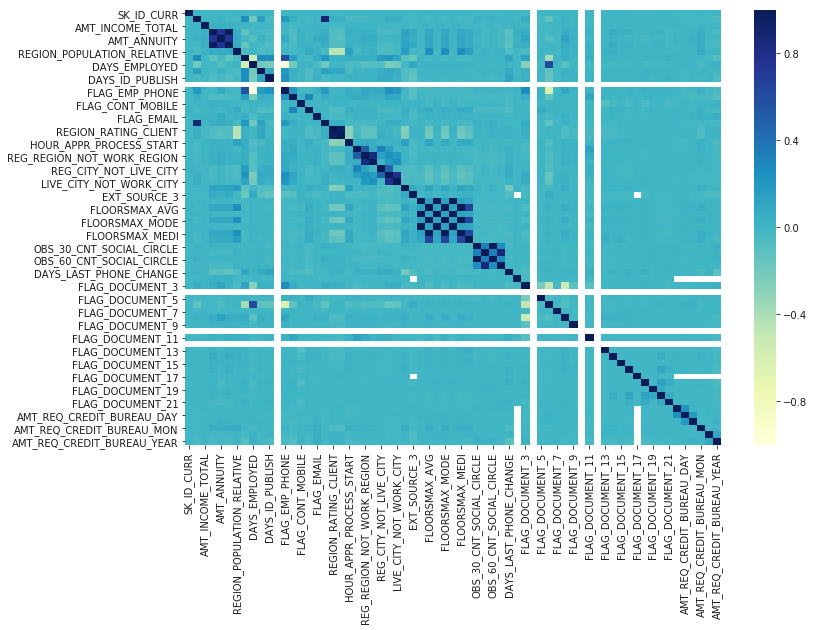

In [45]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(t1_numeric.corr(), cmap="YlGnBu")
plt.show()

#### Finding correlation between columns of Target 0 :

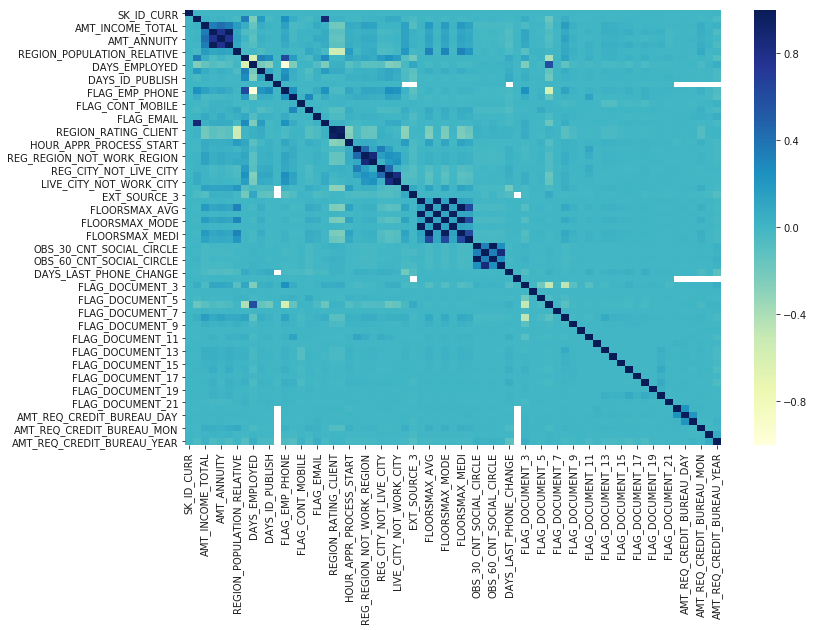

In [46]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(t0_numeric.corr(), cmap="YlGnBu")
plt.show()

### To cross check highly correlated variables of Target 1 and Target 0 are same : 

### Top 10 correlations of t1 dataframe : 


In [47]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(t1_numeric, 10))

Top Absolute Correlations
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
dtype: float64


### Top 10 correlations of t0 dataframe : 

In [48]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(t0_numeric, 10))

Top Absolute Correlations
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987250
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985603
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.962064
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950149
dtype: float64


#### From the above two things you can see the correlation between the two variables for both the categories i.e., target variable with 1 (who has faced difficulties in repaying the lone amount) and target variable with 0.
- AMT_CREDIT and AMT_GOODS_PRICE
- CNT_CHILDREN and CNT_FAM_MEMBERS
- REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION
#### These are the top 3 highly correlated variables.

Variables of Target 0 and Target 1 are same

In [49]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_app[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [50]:
def plot_distribution(var):
    
    i = 0
    t1 = df_app.loc[df_app['TARGET'] != 0]
    t0 = df_app.loc[df_app['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

In [51]:
# non numeric columns
df_app_string = df_app.select_dtypes(include=['object'])

In [52]:
df_app_string.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

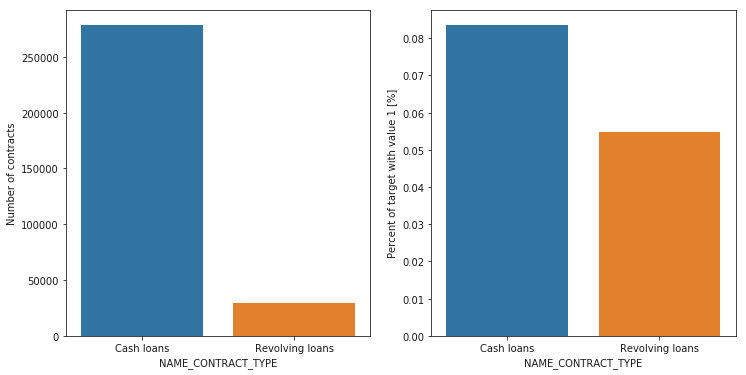

In [53]:
plot_stats('NAME_CONTRACT_TYPE')

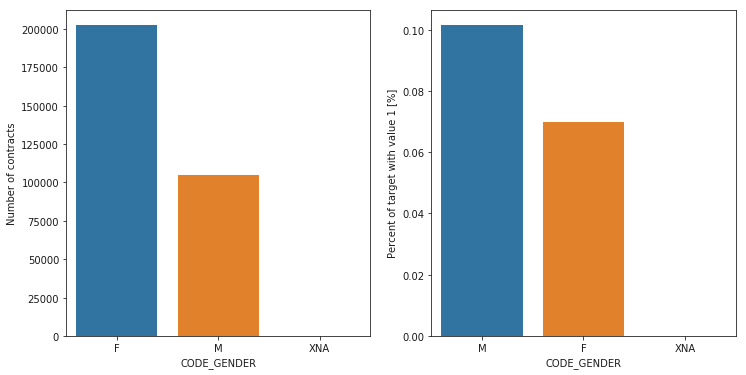

In [54]:
plot_stats('CODE_GENDER')

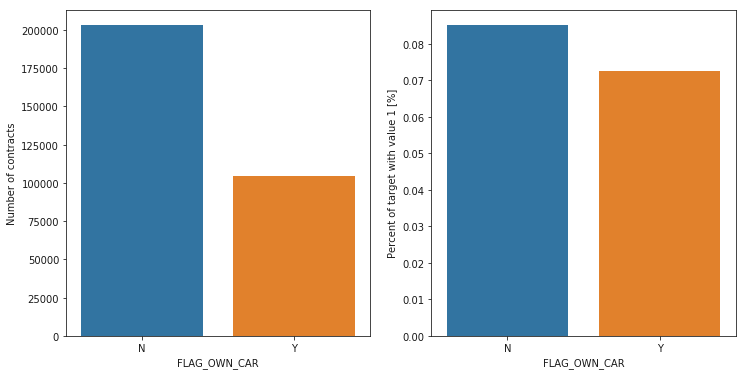

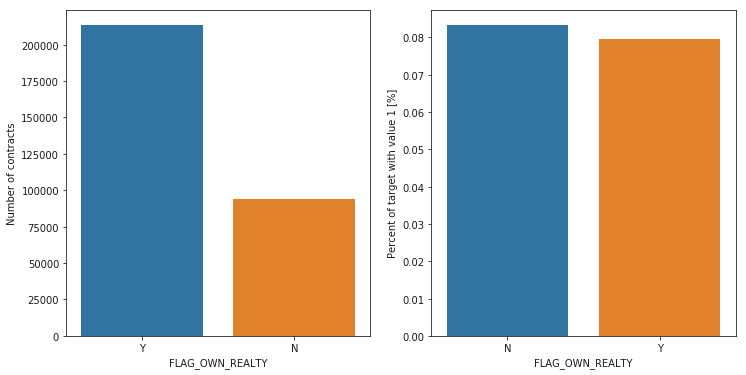

In [55]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

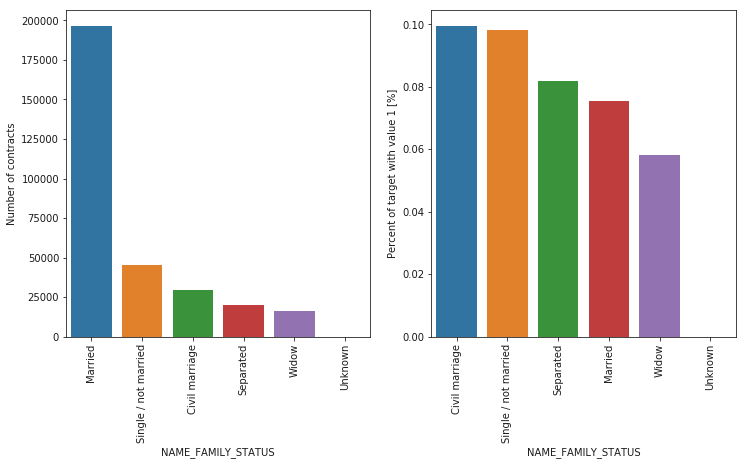

In [56]:
plot_stats('NAME_FAMILY_STATUS',True, True)

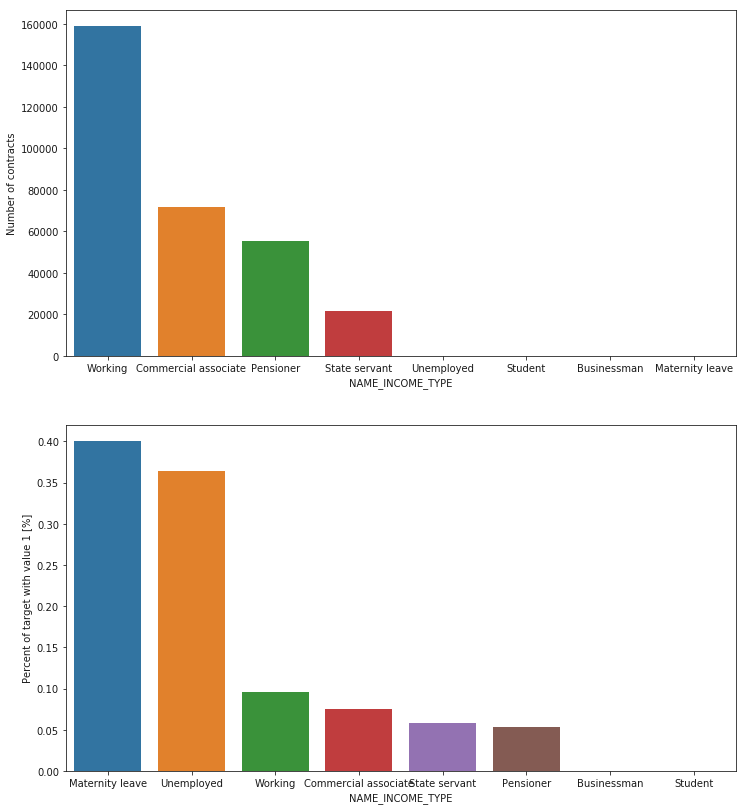

In [57]:
plot_stats('NAME_INCOME_TYPE',False,False)

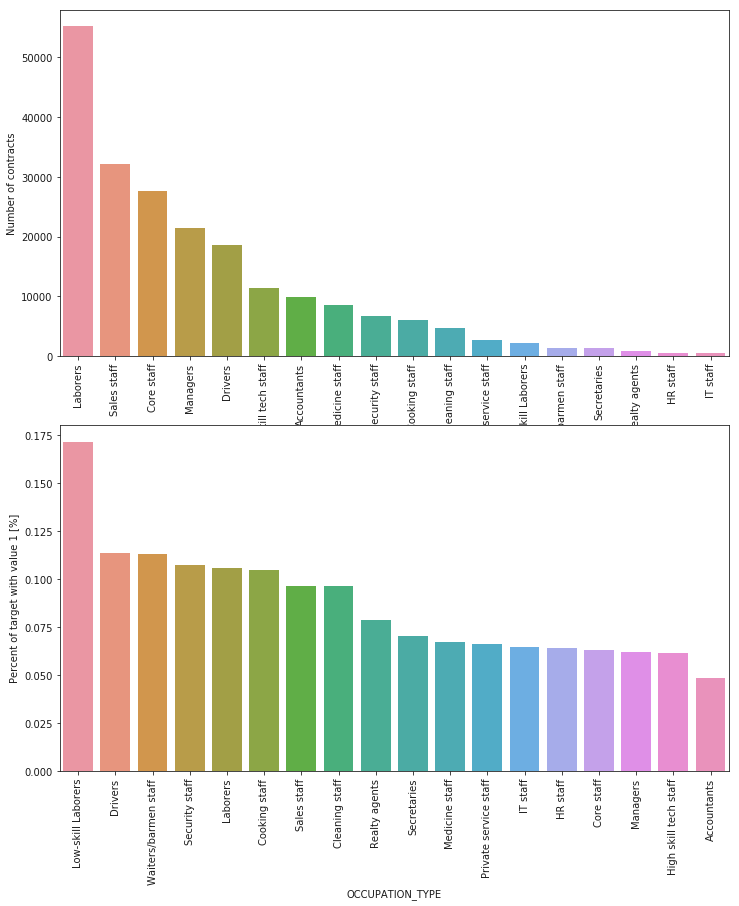

In [58]:
plot_stats('OCCUPATION_TYPE',True, False)

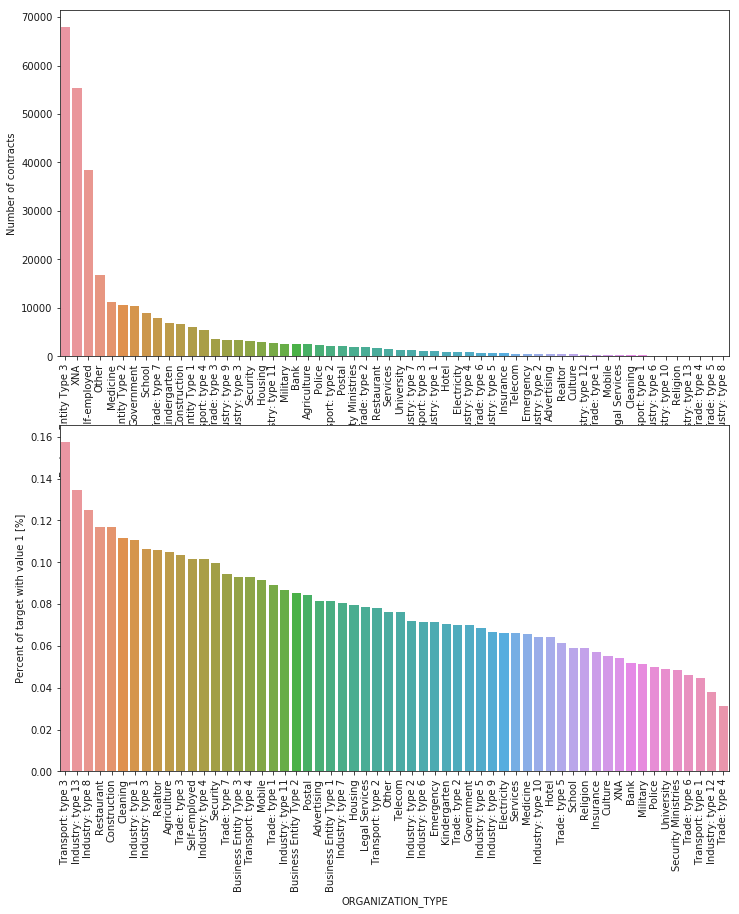

In [59]:
plot_stats('ORGANIZATION_TYPE',True, False)

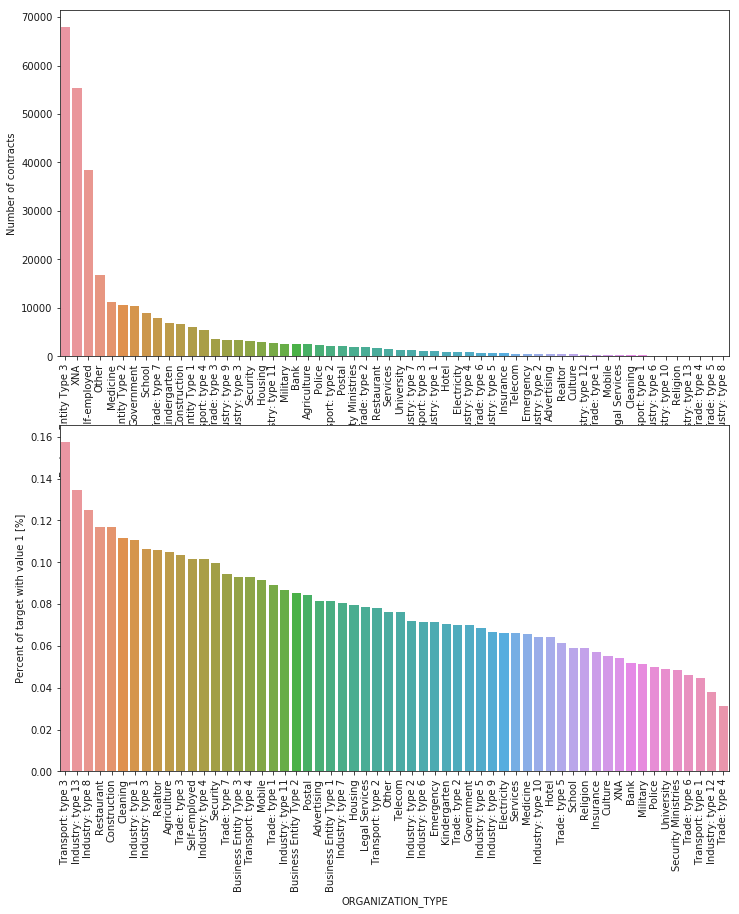

In [60]:
plot_stats('ORGANIZATION_TYPE',True, False)

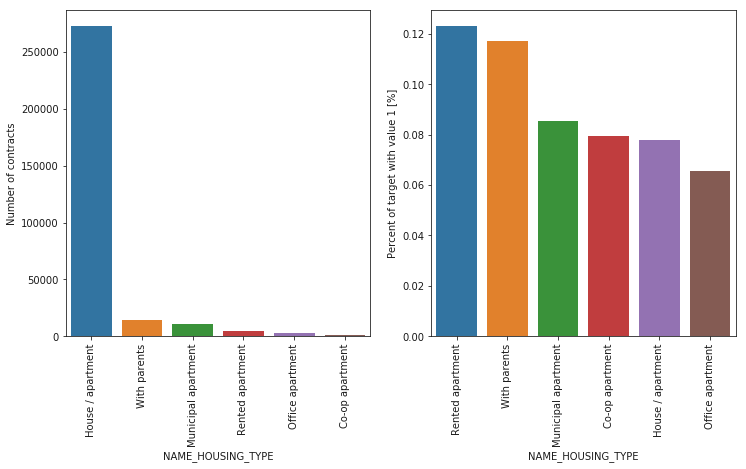

In [61]:
plot_stats('NAME_HOUSING_TYPE',True)

### From the above graphs we can found that :

- Contract type Revolving loans are less when compared to the Revolving loans
- The number of female clients are more, almost double the number of male clients. The percentage of males have a higher chance of not returning their loans '10%' when compared with women '7%'.
- The number of clients having cars were half than the number of clients dont have cars. Both of them having 8% chance of not returning the lone amount.
- The clients that owns real estate are more than double of the ones that doesn't own real estate. Both categories have not-repayment rates less than '8%'.
- Among all the income types Pensioner, State Servent '6%' having more chance of not repaying the lone, when compared to other income types
- Majority of the clients have Secondary/secondary special education, followed by Higher education clients. The people with Academic degree have less than '2%' not-repayment rate. The Lower secondary category have the largest rate of not returning the loan '11%'.
- Most of clients are married, followed by Single/not married and civil marriage. Civil marriage has the highest percent of not repayment '10%', with Widow having the lowest percent of not repaying the lone '6%'.
- The people who are staying in Rented apartment and With parents has higher chance '10%' of not-repaying the lones.
- Laborers taken more number of lones, followed by Sales staff. The category with highest percent of not repaid loans are Low-skill Laborers '17%', followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.
- Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%) are the organisations which does not pay the lone amount.
- Clients with family size of 11 and 13 have not payed the lones at all. Families having 10 or 8 members having the percentage of not repaying of loans is over 30%. Families with 6 or less members have repayment rates close to the 10%.